# 1.	What should be considered a best fit line? Which method is used to identify it?

# 2.	Define Residuals.

# 3.	Name the Regression techniques.

# 4.	Why do we use Regression Analysis?

# 5. Explain Multiple Linear Regression.

# 6.	Write any 3 important points to be noted in Linear Regression model.

# 7.	What are the performance evaluation metrics in Regression?

# 8.	What is Residual Standard Error and Degrees of Freedom?

# 9.	For the given dataset perform the tasks below and write your observations. 
(Health Insurance cost dataset)
a.	Perform EDA

b.	Make plots to find highly correlated values

c.	Evaluate the models using metrics

d.	Find Coefficients and Intercepts

e.	Make Predictions to calculate insurance based on given values and write down interpretations based on the result value.



In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
insur = pd.read_csv("C:\\Users\\dsouz\\Downloads\\insurance (1).csv")

# a.	Perform EDA

In [4]:
insur.head()

,sex,age,sex_male,smoker_yes,southeast,southwest,bmi,children,region_northwest,smoker,region,charges
0,female,19,0,1,0,1,27.900,0,0,yes,southwest,16884.92400
1,male,18,1,0,1,0,33.770,1,0,no,southeast,1725.55230
2,male,28,1,0,1,0,33.000,3,0,no,southeast,4449.46200
3,male,33,1,0,0,0,22.705,0,1,no,northwest,21984.47061
4,male,32,1,0,0,0,28.880,0,1,no,northwest,3866.85520


In [5]:
insur.isnull().sum()

sex                 0
age                 0
sex_male            0
smoker_yes          0
southeast           0
southwest           0
bmi                 0
children            0
region_northwest    0
smoker              0
region              0
charges             0
dtype: int64

In [6]:
insur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
sex                 1338 non-null object
age                 1338 non-null int64
sex_male            1338 non-null int64
smoker_yes          1338 non-null int64
southeast           1338 non-null int64
southwest           1338 non-null int64
bmi                 1338 non-null float64
children            1338 non-null int64
region_northwest    1338 non-null int64
smoker              1338 non-null object
region              1338 non-null object
charges             1338 non-null float64
dtypes: float64(2), int64(7), object(3)
memory usage: 125.5+ KB


In [7]:
insur.describe()

,age,sex_male,smoker_yes,southeast,southwest,bmi,children,region_northwest,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,0.204783,0.272048,0.242900,30.663397,1.094918,0.242900,13270.422265
std,14.049960,0.500160,0.403694,0.445181,0.428995,6.098187,1.205493,0.428995,12110.011237
min,18.000000,0.000000,0.000000,0.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,0.000000,0.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,0.000000,0.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,0.000000,1.000000,0.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,1.000000,1.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


# b.	Make plots to find highly correlated values

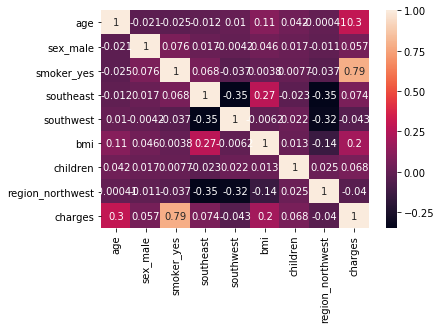

In [8]:
sns.heatmap(insur.corr(),annot=True)

In [9]:
insur.corr()

,age,sex_male,smoker_yes,southeast,southwest,bmi,children,region_northwest,charges
age,1.000000,-0.020856,-0.025019,-0.011642,0.010016,0.109272,0.042469,-0.000407,0.299008
sex_male,-0.020856,1.000000,0.076185,0.017117,-0.004184,0.046371,0.017163,-0.011156,0.057292
smoker_yes,-0.025019,0.076185,1.000000,0.068498,-0.036945,0.003750,0.007673,-0.036945,0.787251
southeast,-0.011642,0.017117,0.068498,1.000000,-0.346265,0.270025,-0.023066,-0.346265,0.073982
southwest,0.010016,-0.004184,-0.036945,-0.346265,1.000000,-0.006205,0.021914,-0.320829,-0.043210
bmi,0.109272,0.046371,0.003750,0.270025,-0.006205,1.000000,0.012759,-0.135996,0.198341
children,0.042469,0.017163,0.007673,-0.023066,0.021914,0.012759,1.000000,0.024806,0.067998
region_northwest,-0.000407,-0.011156,-0.036945,-0.346265,-0.320829,-0.135996,0.024806,1.000000,-0.039905
charges,0.299008,0.057292,0.787251,0.073982,-0.043210,0.198341,0.067998,-0.039905,1.000000


C:\Users\dsouz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


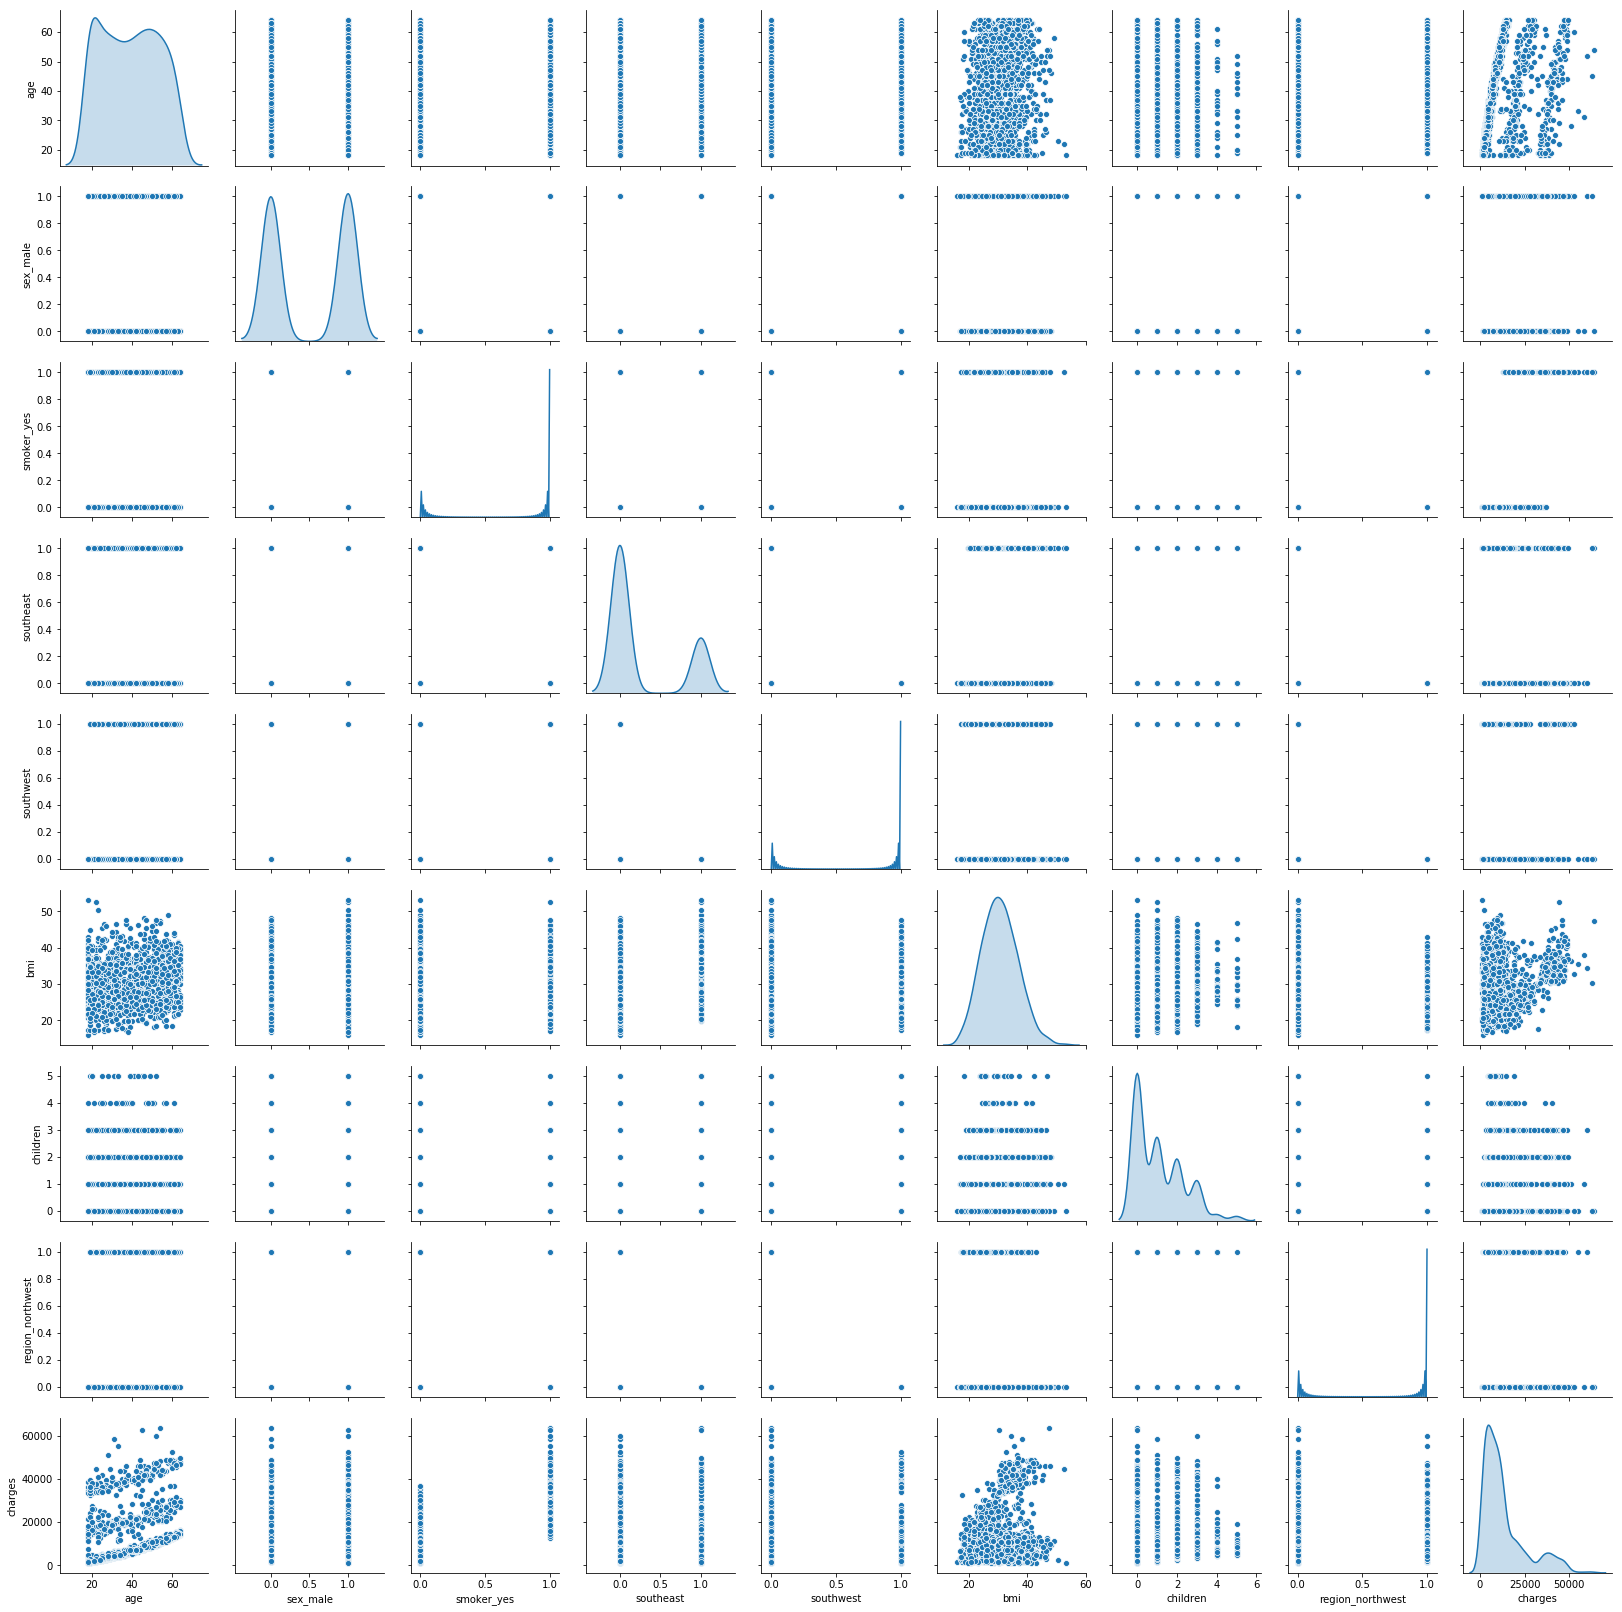

In [10]:
sns.pairplot(insur,diag_kind='kde')

In [11]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [12]:
insur.columns

Index(['sex', 'age', 'sex_male', 'smoker_yes', 'southeast', 'southwest', 'bmi',
       'children', 'region_northwest', 'smoker', 'region', 'charges'],
      dtype='object')

In [13]:
model=smf.ols('charges~age+sex_male+smoker_yes+southeast+southwest+bmi+children+region_northwest',insur).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 08 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:20:58   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
sex_male          -131.3144    332.945     -0.394      0.693    -784.470     521.842
smoker_yes        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
southeast        -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
southwest         -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model1=smf.ols('charges~age+smoker_yes+southeast+southwest+bmi+children',insur).fit()

In [16]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.3
Date:                Thu, 08 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:20:58   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.217e+04    949.538    -12.812      0.000    -1.4e+04   -1.03e+04
age          257.0064     11.889     21.617      0.000     233.683     280.330
smoker_yes  2.384e+04    411.659     57.921      0.000     2.3e+04    2.47e+04
southeast   -858.4696    415.206     -2.068      0.039   -1672.998     -43.941
southwest   -782.7452    413.756     -1.892      0.059   -1594.430      28.940
bmi          338.6413     28.554     11.860      0.000     282.625     394.657
children     471.5441    137.656      3.426      0.001     201.498     741.590
==============================================================================
Omnibus:                      300.125   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.587
Skew:                           1.211   Prob(JB):                    2.48e-156
Kurtosis:                       5.643   Cond. No.                         295.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model1.params

Intercept    -12165.382436
age             257.006391
smoker_yes    23843.874933
southeast      -858.469642
southwest      -782.745230
bmi             338.641335
children        471.544144
dtype: float64

In [18]:
x=insur.drop(['sex','smoker','region','charges'],axis='columns')

In [19]:
y=insur['charges']

In [20]:
x.head()

,age,sex_male,smoker_yes,southeast,southwest,bmi,children,region_northwest
0,19,0,1,0,1,27.900,0,0
1,18,1,0,1,0,33.770,1,0
2,28,1,0,1,0,33.000,3,0
3,33,1,0,0,0,22.705,0,1
4,32,1,0,0,0,28.880,0,1


In [21]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=30,random_state=5)

In [24]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [25]:
sc.fit(xtrain)

C:\Users\dsouz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
xtrain=pd.DataFrame(sc.fit_transform(xtrain),columns=xtrain.columns)

C:\Users\dsouz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dsouz\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
xtrain.head()

,age,sex_male,smoker_yes,southeast,southwest,bmi,children,region_northwest
0,0.201060,-1.018520,-0.508825,-0.609154,-0.567933,1.746411,-0.084378,-0.566756
1,-1.439044,0.981817,-0.508825,-0.609154,-0.567933,-0.895064,-0.914204,1.764428
2,-1.296426,-1.018520,-0.508825,-0.609154,-0.567933,0.487826,0.745447,1.764428
3,0.628914,-1.018520,-0.508825,1.641620,-0.567933,0.438758,-0.914204,-0.566756
4,0.628914,0.981817,1.965313,1.641620,-0.567933,-1.018551,-0.914204,-0.566756


In [28]:
xtest=pd.DataFrame(sc.transform(xtest),columns=xtest.columns)

C:\Users\dsouz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [29]:
xtest.head()

,age,sex_male,smoker_yes,southeast,southwest,bmi,children,region_northwest
0,-1.510352,-1.018520,-0.508825,-0.609154,-0.567933,-0.087083,-0.914204,-0.566756
1,-1.082499,0.981817,1.965313,-0.609154,-0.567933,-0.133697,-0.914204,-0.566756
2,1.056767,-1.018520,-0.508825,-0.609154,-0.567933,-0.491073,-0.084378,1.764428
3,-1.225117,-1.018520,-0.508825,-0.609154,1.760771,0.875460,-0.914204,-0.566756
4,-0.298102,-1.018520,-0.508825,1.641620,-0.567933,0.582690,-0.084378,-0.566756


In [30]:
xtrain.shape

(1308, 8)

In [31]:
xtest.shape

(30, 8)

In [32]:
ytrain.shape

(1308,)

In [33]:
ytest.shape

(30,)

In [34]:
LR=LinearRegression()

In [35]:
LR.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# d.	Find Coefficients and Intercepts

In [36]:
LR.intercept_

13285.73317317202

In [37]:
LR.coef_

array([3574.65948988,  -34.22805762, 9620.8398967 , -531.49801406,
       -449.88812534, 2100.42428647,  571.53779627, -178.32424986])

In [38]:
y_pred=LR.predict(xtest)
y_pred

array([ 3001.19983049, 28167.53271544, 11387.79645145,  4994.91325563,
        8019.38654752, 34965.17490328, 11842.0542097 , 10599.71044853,
        8191.1969559 , 11014.42254288, 15603.60279595, 11183.11018541,
        4912.26326451,  9355.29925313,  8402.61170365,  8755.68007812,
       31909.36344006, 12561.01490387, 12840.20451173,  7594.47796858,
       28361.55495435,  1813.39246607,  2970.94438755,  3793.1986043 ,
        2201.17532563,  9351.34822695, 36786.5964489 , 17432.4677348 ,
       10445.93049527, 14003.13517967])

In [39]:
LR.score(xtest,ytest)

0.7919008687700304

# c.	Evaluate the models using metrics

In [40]:
Mse=np.mean((ytest-y_pred)**2)
Mse

28833380.612642944

In [41]:
Rmse=np.sqrt(np.mean((ytest-y_pred)**2))
Rmse

5369.672300303152

In [42]:
from sklearn import metrics

In [43]:
rmse=np.sqrt(metrics.mean_squared_error(ytest,y_pred))
rmse

5369.672300303153

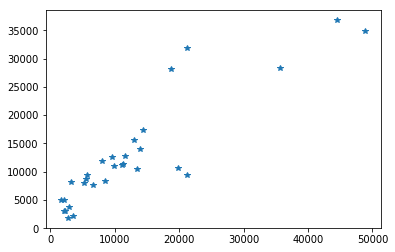

In [44]:
plt.plot(ytest,y_pred,'*')

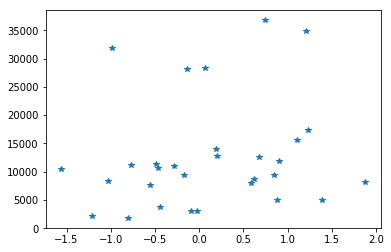

In [45]:
plt.plot(xtest['bmi'],y_pred,'*')

In [46]:
ytest.head()

471      2203.47185
1250    18648.42170
1257    11305.93455
139      2166.73200
919      5245.22690
Name: charges, dtype: float64

In [47]:
xtest.head()

,age,sex_male,smoker_yes,southeast,southwest,bmi,children,region_northwest
0,-1.510352,-1.018520,-0.508825,-0.609154,-0.567933,-0.087083,-0.914204,-0.566756
1,-1.082499,0.981817,1.965313,-0.609154,-0.567933,-0.133697,-0.914204,-0.566756
2,1.056767,-1.018520,-0.508825,-0.609154,-0.567933,-0.491073,-0.084378,1.764428
3,-1.225117,-1.018520,-0.508825,-0.609154,1.760771,0.875460,-0.914204,-0.566756
4,-0.298102,-1.018520,-0.508825,1.641620,-0.567933,0.582690,-0.084378,-0.566756


# e.	Make Predictions to calculate insurance based on given values and write down interpretations based on the result value.

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
DT = DecisionTreeRegressor(criterion='mse',random_state=5,max_depth=4,min_samples_leaf=1)

In [51]:
DT.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=5, splitter='best')

In [52]:
from sklearn.tree import export_graphviz

In [58]:
pip install pydotplus


The following command must be run outside of the IPython shell:

    $ pip install pydotplus

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [59]:
import pydotplus

In [60]:
export_graphviz(DT,out_file='DTG')

In [62]:
ypred1 = DT.predict(xtest)

In [63]:
print(ypred1[4:9])

[ 7470.35491482 45318.25922143 10659.50994119 10659.50994119
  5952.01013259]


In [64]:
print(ytest[4:9])

919      5245.22690
488     48885.13561
691      8068.18500
159     19749.38338
1239     3238.43570
Name: charges, dtype: float64


In [65]:
Rmse=np.sqrt(metrics.mean_squared_error(ytest,ypred1))
Rmse

3152.02632047138

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
RFR = RandomForestRegressor(n_estimators=10,random_state=5)

In [68]:
RFR.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

In [69]:
YP = RFR.predict(xtest)

In [70]:
Rmse=np.sqrt(metrics.mean_squared_error(ytest,YP))
Rmse

4761.3832821819215